In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fig_publication.mplstyle')

In [2]:
bank_and_tns_df = pd.read_csv('../loci_dbs/alerce_cut/bank_and_tns_df.csv.gz', compression='gzip', index_col=0)

df = pd.DataFrame(bank_and_tns_df.index)

# Extract the year from the last two characters of 'ztf_object_id'
df['year'] = df['ztf_object_id'].str[3:5]

# Group by the 'year' column and count the entries in each group
yearly_counts_df = df.groupby('year').size().reset_index(name='entry_count')
yearly_counts_df['per'] = (yearly_counts_df['entry_count'] / 5472) * 100
# Display the result
yearly_counts_df

,year,entry_count,per
0,17,3,0.054825
1,18,595,10.873538
2,19,221,4.038743
3,20,1095,20.010965
4,21,3379,61.750731
5,22,179,3.271199


In [3]:
# % year entry_count	   %     %-rounded
# % 17	3	       0.054825   0%
# % 18	595	       10.873538 11%
# % 19	221	       4.038743   4%
# % 20	1095	   20.010965  20%
# % 21	3379	   61.750731  62%
# % 22	179	       3.271199   3%

# % sums from 81 ANN=8 cand:
# % 2017: 0 + 0 (0\%)
# % 2018: 12dupls+21uniq = 33 tot (41\%)
# % 2019: 0dupls+7uniq = 7 tot (9\%)
# % 2020: 3dupls+11uniq = 14 tot (17\%)
# % 2021: 6dupls+21uniq = 27 tot (33\%)
# % 2022: 0 + 0 (0\%)

# % sums from 241 exhaustive cand:
# % 2017: 0  (0\%)
# % 2018: 99 (41\%)
# % 2019: 11 (5\%)
# % 2020: 27 (11\%)
# % 2021: 104 (43\%)
# % 2022: 0 + 0 (0\%)

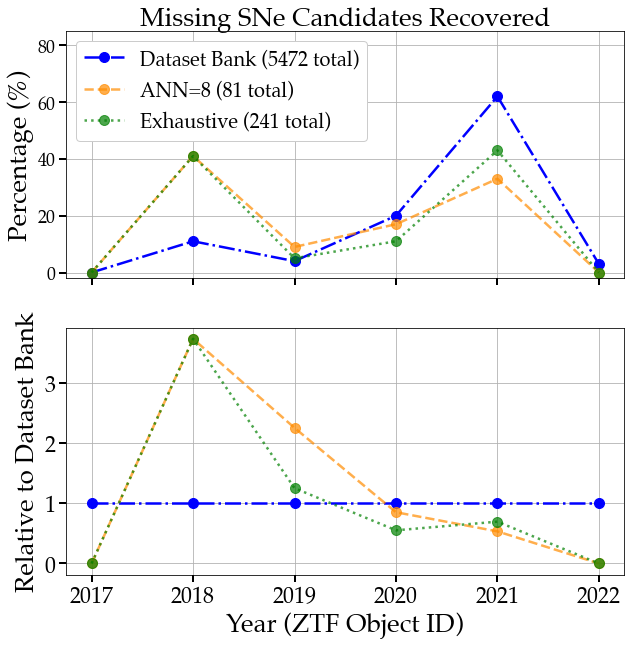

In [4]:
# Data from the first table
years = [2017, 2018, 2019, 2020, 2021, 2022]
true_percentage = [0, 11, 4, 20, 62, 3]
entry_count = [3, 595, 221, 1095, 3379, 179]  # entry_count corresponding to each year

# Data from the second table (ANN=8 method)
ann8_percentage = [0, 41, 9, 17, 33, 0]

# Data from the third table (exhaustive method)
exhaustive_percentage = [0, 41, 5, 11, 43, 0]

# Calculate the weighted percentage as the ratio of ANN=8 and Exhaustive values to the corresponding true percentage
weighted_percentage_true = [1, 1, 1, 1, 1, 1]
weighted_percentage_ann8 = [ann8 / true  if true != 0 else 0 for ann8, true in zip(ann8_percentage, true_percentage)]
weighted_percentage_exhaustive = [exhaustive / true  if true != 0 else 0 for exhaustive, true in zip(exhaustive_percentage, true_percentage)]

# Create a line plot
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax1.plot(years, true_percentage, marker='o', markersize=10, label='Dataset Bank (5472 total)', color='blue', lw=2.5, ls='-.')
ax1.plot(years, ann8_percentage, marker='o', markersize=10, label='ANN=8 (81 total)', color='darkorange', alpha=0.7, lw=2.5, ls='--')
ax1.plot(years, exhaustive_percentage, marker='o', markersize=10, label='Exhaustive (241 total)', color='green', alpha=0.7, lw=2.5, ls=':')


# # Add labels for entry_count at each true percentage point
# for i, txt in enumerate(entry_count):
#     plt.annotate(f'{txt}', (years[i], true_percentage[i]), fontsize=20, textcoords="offset points", xytext=(0, 10), ha='center')

# Add labels and title
ax1.set_ylim(-2, 85)
ax1.set_ylabel('Percentage (%)', fontsize=26)
ax1.set_title('Missing SNe Candidates Recovered', fontsize=26)
ax1.legend(framealpha=1.0, fontsize=20)
ax1.grid(True)

# Plot on the second subplot
ax2.plot(years, [1, 1, 1, 1, 1, 1], marker='o', markersize=10, label='Dataset Bank (5472 total)', color='blue', lw=2.5, ls='-.')
ax2.plot(years, weighted_percentage_ann8, marker='o', markersize=10, label='ANN=8 (81 total)', color='darkorange', alpha=0.7, lw=2.5, ls='--')
ax2.plot(years, weighted_percentage_exhaustive, marker='o', markersize=10, label='Exhaustive (241 total)', color='green', alpha=0.7, lw=2.5, ls=':')

# for i, txt in enumerate(entry_count):
#     ax2.annotate(f'{txt}', (years[i], weighted_percentage_true[i]), fontsize=16, textcoords="offset points", xytext=(0, 10), ha='center')

# Add labels and title to the second subplot
ax2.set_xlabel('Year (ZTF Object ID)', fontsize=26)
ax2.set_ylabel('Relative to Dataset Bank', fontsize=26)
# Display the plot
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True)
plt.savefig("../figures/missing_SNe_recovered.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
weighted_percentage_ann8

[0, 3.727272727272727, 2.25, 0.85, 0.532258064516129, 0.0]

In [6]:
weighted_percentage_exhaustive

[0, 3.727272727272727, 1.25, 0.55, 0.6935483870967742, 0.0]